In [1]:
import numpy as np
from scipy.stats import levy_stable
import scipy
import math
import random
import levy
from matplotlib import pyplot

In [2]:
def create_seascape_uniform(patch_length, patch_count, seascape_length, seascape_width):
    if(seascape_length % patch_length != 0 or seascape_width % patch_length !=0):
        raise Exception("Seascape length and width must both be dividable by patch length")
    seascape = np.zeros((seascape_length, seascape_width))
    i = 0
    x = random.randint(0, seascape_width-100) #Initial patch placements
    y = random.randint(0, seascape_length-100)
    while(i < patch_count):
        patch = generate_patch(100)
        #print(patch.shape, x, y)
        y2 = 0
        for y1 in range(y, y + patch_length): #This is to replace the values with the values generated from the patch generator
            x2 = 0
            for x1 in range(x, x+patch_length):
                if(x1 >= seascape_width): #Torus properties
                    x1 -= seascape_width
                if(y1 >= seascape_length):
                    y1 -= seascape_length
                seascape[y1][x1] = seascape[y1][x1] + patch[y2][x2] #Update cell value
                x2+=1
            y2+=1
        ang = random.randint(-360,360)
        step = np.random.uniform(low=-seascape_length, high=seascape_length)
        xstep = int(step * math.cos(math.radians(ang)))
        ystep = int(step * math.sin(math.radians(ang)))
        newposy = int(y + ystep)
        newposx = int(x + xstep)
        if(newposy >= seascape_length - 1):
            newposy = newposy - seascape_length - 1
        if(newposy < 0):
            newposy = newposy + seascape_length - 1
        if(newposx >= seascape_width - 1):
            newposx = newposx - seascape_width - 1
        if(newposx < 0):
            newposx = newposx + seascape_width - 1
        y = newposy
        x = newposx
        i += 1
        #print(seascape)
    return seascape

In [3]:
def create_seascape_levy(patch_length, patch_count, seascape_length, seascape_width):
    if(seascape_length % patch_length != 0 or seascape_width % patch_length !=0):
        raise Exception("Seascape length and width must both be dividable by patch length")
    seascape = np.zeros((seascape_length, seascape_width))
    i = 0
    x = random.randint(0, seascape_width-1)
    y = random.randint(0, seascape_length-1)
    a = np.array(np.concatenate((range(-2500,-100), range(100,2500)))) #concat range of min and max values + and -
    prob = levy.levy(a, 1, 0) #get probability distribution for walk
    steps = [random.choices(a, weights=prob) for x in range(patch_count)]
    while(i < patch_count):
        patch = generate_patch(patch_length)
        #print(patch.shape, x, y)
        y2 = 0
        for y1 in range(y, y + patch_length): #This is to replace the values with the values generated from the patch generator
            x2 = 0
            for x1 in range(x, x+patch_length):
                if(x1 >= seascape_width): #Torus properties
                    x1 -= seascape_width
                if(y1 >= seascape_length):
                    y1 -= seascape_length
                seascape[y1][x1] = seascape[y1][x1] + patch[y2][x2] #Update cell value
                x2+=1
            y2+=1
        ang = random.randint(-360,360)
        xstep = int(steps[i][0] * math.cos(math.radians(ang)))
        ystep = int(steps[i][0] * math.sin(math.radians(ang)))
        newposy = int(y + ystep)
        newposx = int(x + xstep)
        if(newposy >= seascape_length - 1):
            newposy = newposy - seascape_length - 1
        if(newposy < 0):
            newposy = newposy + seascape_length - 1
        if(newposx >= seascape_width - 1):
            newposx = newposx - seascape_width - 1
        if(newposx < 0):
            newposx = newposx + seascape_width - 1
        y = newposy
        x = newposx
        i += 1
        #print(seascape)
    return seascape
    

In [4]:
def generate_patch(patch_length):
    patch = np.zeros((patch_length,patch_length))
    req_area = (patch_length**2)
    big_l = int(req_area**.5)
    hit = 0
    while(hit < req_area):
        pos=(50,50)
        l = big_l
        a = np.array(np.concatenate((range(int(-patch_length/4),0), range(0,int(patch_length/4))))) #concat range of min and max values + and -
        prob = scipy.stats.norm(0, 7).pdf(np.concatenate((range(int(-patch_length/4),0), range(0,int(patch_length/4))))) #get probability distribution for walk
        xsteps = [random.choices(a, weights=prob) for x in range(big_l)] #get x displacement
        ysteps = [random.choices(a, weights=prob) for y in range(big_l)] #get y displacement
        for i in range(big_l):
            newposy = int(pos[0] + ysteps[i][0])
            newposx = int(pos[1] + xsteps[i][0])
            if(newposy >= 100):
                newposy = newposy - 100
            elif(newposy < 0):
                newposy = newposy + 100
            if(newposx >= 100):
                newposx = newposx - 100
            elif(newposx < 0):
                newposx = newposx + 100
            pos = (newposy, newposx)
            if(patch[pos[0]][pos[1]] == 0):
                patch[pos[0]][pos[1]] = l
                hit += 1
            l -= 1
    return patch

In [5]:
def reward(levy_sea, walk):
    pos=np.random.randint(len(levy_sea))
    reward = 0
    for x in range(len(walk)):
        if(walk[x][0] < 0):
            for y in range(walk[x][0], 0):
                reward += levy_sea[pos][x]
                pos-=1
                if(pos<0):
                    pos+=2500
        else:
            for y in range(walk[x][0]):
                reward += levy_sea[pos][x]
                pos+=1
                if(pos >= 2500):
                    pos-=2500
        
    return reward

In [6]:
def random_walk(N):
    s = np.random.uniform(-2500, 2500, size=N)
    steps = [[int(x)] for x in s]
    random_walk = np.cumsum(steps)
    return random_walk, steps
            
def levy_walk(N):
    a = np.array(np.concatenate((range(-2500,-50), range(50,2500))))
    prob = levy.levy(a, 1, 0)
    steps = [random.choices(a, weights=prob) for x in range(N)]
    random_walk = np.cumsum(steps)
    return random_walk, steps

### Testing

[[-60], [135], [125], [-195], [-398], [-62], [53], [171], [-81], [87], [152], [426], [199], [-75], [68], [-353], [-163], [276], [-91], [53], [96], [56], [188], [-72], [-122], [245], [-53], [-185], [53], [94], [-127], [-72], [-76], [-53], [92], [71], [94], [-169], [205], [-121], [52], [245], [-144], [-281], [-161], [-62], [-220], [412], [-54], [-52]]
2.92


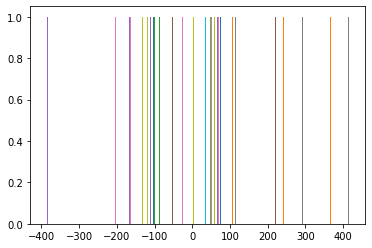

In [7]:
a = np.array(np.concatenate((range(-2500,-50), range(50,2500))))
prob = levy.levy(a, 1, 0)
steps = [random.choices(a, weights=prob) for x in range(50)]
print(steps)
pyplot.hist(steps)
print(np.mean(steps))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


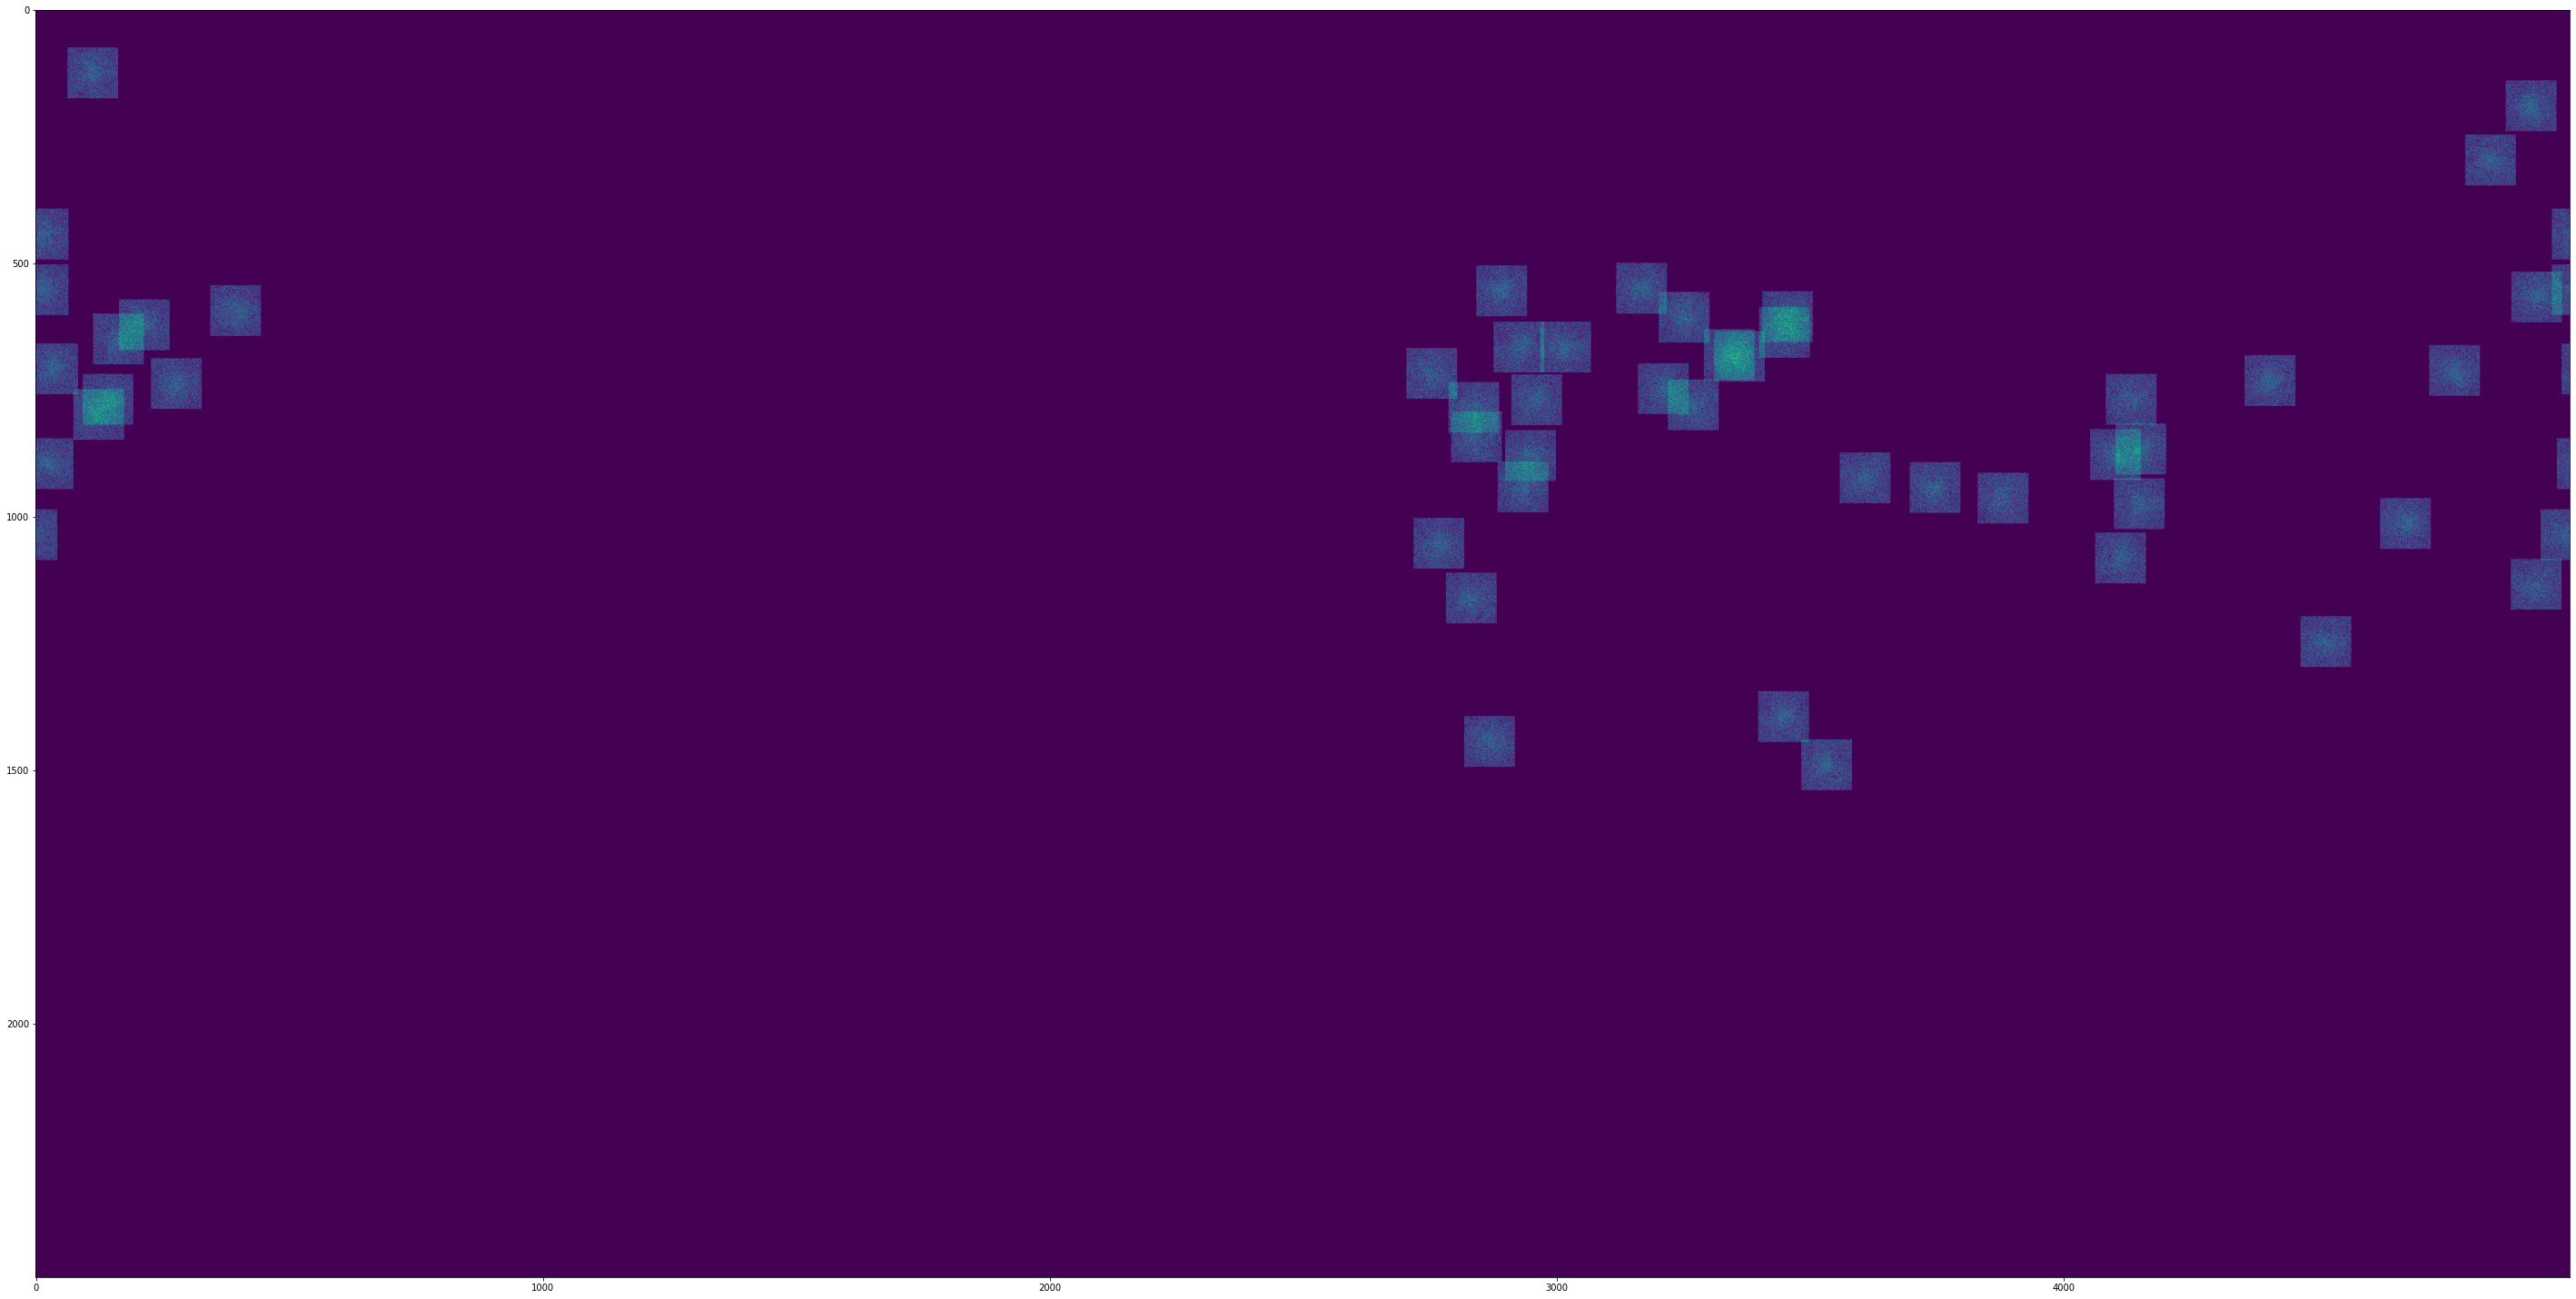

In [8]:
seascape = create_seascape_levy(100,50,2500,5000)
print(seascape)
np.save('seascape.npy', seascape)
pyplot.figure(figsize=(50,50))
pyplot.imshow(seascape)
pyplot.show()

In [ ]:
seascapes = []
for i in range(20):
    seascape_uniform = create_seascape_uniform(100,50,2500,5000)
    N = 5000
    R, steps = levy_walk(N)
    seascapes.append(seascape_uniform)

In [ ]:
seascapes_ll = []
for i in range(20):
    seascape_levy = create_seascape_levy(100,50,2500,5000)
    N = 5000
    R, epsilon = levy_walk(N)
    R = R * np.sqrt(1./N)
    seascapes_ll.append(seascape_levy)

In [ ]:
walks_new_levy = []
walks_new_random = []
for i in range(20):
    Rl, steps_levy = levy_walk(5000)
    Rr, steps_r = random_walk(5000)
    walks_new_levy.append(steps_levy)
    walks_new_random.append(steps_r)

In [ ]:
arr_consumption_new_ll = []
arr_consumption_new_lr = []
arr_consumption_new_rl = []
arr_consumption_new_rr = []
i=0
for seascape in seascapes_ll:
    for walk in walks_new_levy:
        if(i%100==0): print(i)
        i+=1
        consumption = reward(seascape, walk)
        arr_consumption_new_ll.append(consumption)
    for walk in walks_new_random:
        if(i%100==0): print(i)
        i+=1
        consumption = reward(seascape, walk)
        arr_consumption_new_rl.append(consumption)
for seascape in seascapes:
    for walk in walks_new_levy:
        if(i%100==0): print(i)
        i+=1
        consumption = reward(seascape, walk)
        arr_consumption_new_lr.append(consumption)
    for walk in walks_new_random:
        if(i%100==0): print(i)
        i+=1
        consumption = reward(seascape, walk)
        arr_consumption_new_rr.append(consumption)